In [452]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [453]:
df = pd.read_csv("./data/vehicle_prod.csv")
df

,Unnamed: 0,2007,2008,2009,2010,2011
0,China,7.71,7.95,11.96,15.84,16.33
1,EU,19.02,17.71,15.00,16.70,17.48
2,US,10.47,8.45,5.58,7.60,8.40
3,Japan,10.87,10.83,7.55,9.09,7.88
4,Korea,4.04,3.78,3.45,4.20,4.62
5,Mexico,2.01,2.05,1.50,2.25,2.54


In [454]:
df_index_col = pd.read_csv("./data/vehicle_prod.csv", index_col=0)
df_index_col

,2007,2008,2009,2010,2011
China,7.71,7.95,11.96,15.84,16.33
EU,19.02,17.71,15.00,16.70,17.48
US,10.47,8.45,5.58,7.60,8.40
Japan,10.87,10.83,7.55,9.09,7.88
Korea,4.04,3.78,3.45,4.20,4.62
Mexico,2.01,2.05,1.50,2.25,2.54


In [455]:
df[['2007']]

,2007
0,7.71
1,19.02
2,10.47
3,10.87
4,4.04
5,2.01


In [456]:
df['2007']

0     7.71
1    19.02
2    10.47
3    10.87
4     4.04
5     2.01
Name: 2007, dtype: float64

In [457]:
print(df.columns)
print(df.columns.to_list())

Index(['Unnamed: 0', '2007', '2008', '2009', '2010', '2011'], dtype='object')
['Unnamed: 0', '2007', '2008', '2009', '2010', '2011']


# 상관관계
corr()

In [458]:
df_index_col.corr()

,2007,2008,2009,2010,2011
2007,1.000000,0.991073,0.831447,0.769040,0.758271
2008,0.991073,1.000000,0.872296,0.810529,0.789512
2009,0.831447,0.872296,1.000000,0.988513,0.980025
2010,0.769040,0.810529,0.988513,1.000000,0.992667
2011,0.758271,0.789512,0.980025,0.992667,1.000000


In [459]:
# 2007~11 생산량을 합한 totol_production 컬럼 생성
df = df_index_col

In [460]:
df

,2007,2008,2009,2010,2011
China,7.71,7.95,11.96,15.84,16.33
EU,19.02,17.71,15.00,16.70,17.48
US,10.47,8.45,5.58,7.60,8.40
Japan,10.87,10.83,7.55,9.09,7.88
Korea,4.04,3.78,3.45,4.20,4.62
Mexico,2.01,2.05,1.50,2.25,2.54


In [461]:
def asd(a):
    return(sum(a))

In [462]:
df.sum()

2007    54.12
2008    50.77
2009    45.04
2010    55.68
2011    57.25
dtype: float64

In [463]:
df['totol_production'] = df.sum(axis=1)
df.loc['totol_production'] = [sum(df[i]) for i in df.columns]

In [464]:
df

,2007,2008,2009,2010,2011,totol_production
China,7.71,7.95,11.96,15.84,16.33,59.79
EU,19.02,17.71,15.00,16.70,17.48,85.91
US,10.47,8.45,5.58,7.60,8.40,40.50
Japan,10.87,10.83,7.55,9.09,7.88,46.22
Korea,4.04,3.78,3.45,4.20,4.62,20.09
Mexico,2.01,2.05,1.50,2.25,2.54,10.35
totol_production,54.12,50.77,45.04,55.68,57.25,262.86


In [465]:
month_se = pd.Series(['1월', '2월', '3월', '4월'])
income_se = pd.Series([9500, 6200, 6050, 7000])
expenses_se = pd.Series([5040, 2350, 2300, 4800])

store_df = pd.DataFrame({
    '월': month_se,
    '수입': income_se,
    '지출': expenses_se
}, index='월')

TypeError: Index(...) must be called with a collection of some kind, '월' was passed

In [ ]:
store_df

,월,수입,지출,순수입
0,1월,9500,5040,4460
1,2월,6200,2350,3850
2,3월,6050,2300,3750
3,4월,7000,4800,2200


In [ ]:
store_df['순수입'] = store_df['수입'] - store_df['지출']
store_df

,월,수입,지출,순수입
0,1월,9500,5040,4460
1,2월,6200,2350,3850
2,3월,6050,2300,3750
3,4월,7000,4800,2200


# 시각화

In [ ]:
df = pd.read_csv("./data/vehicle_prod.csv", index_col=0)
df

,2007,2008,2009,2010,2011
China,7.71,7.95,11.96,15.84,16.33
EU,19.02,17.71,15.00,16.70,17.48
US,10.47,8.45,5.58,7.60,8.40
Japan,10.87,10.83,7.55,9.09,7.88
Korea,4.04,3.78,3.45,4.20,4.62
Mexico,2.01,2.05,1.50,2.25,2.54


<Axes: >

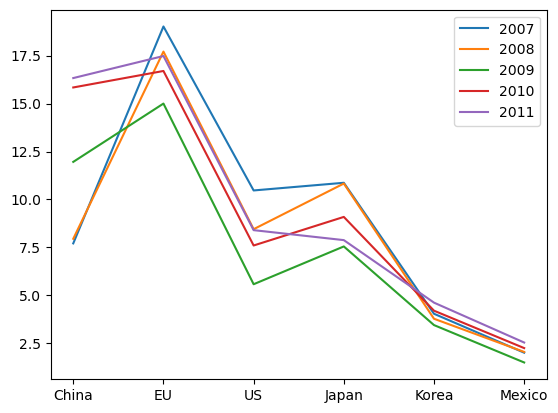

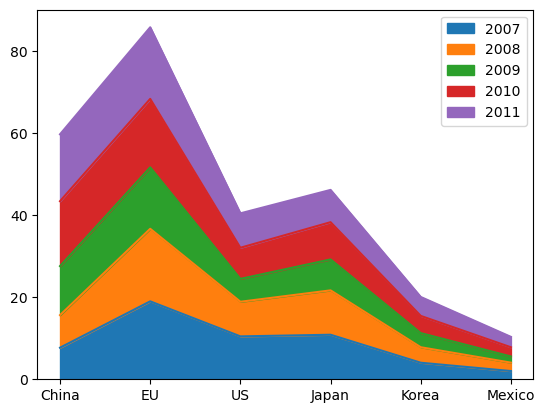

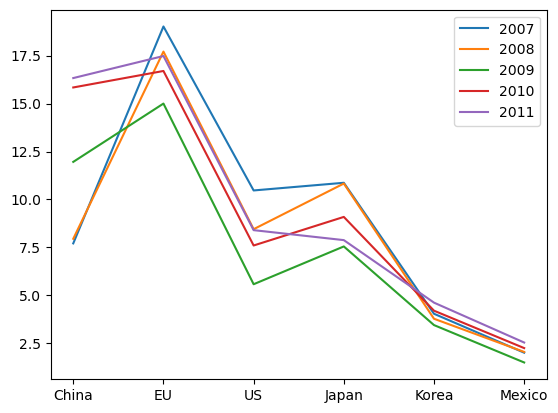

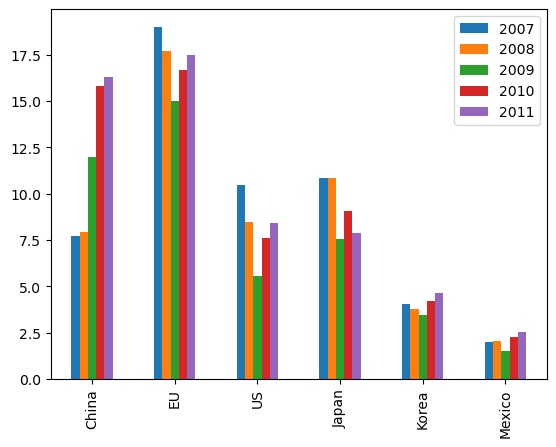

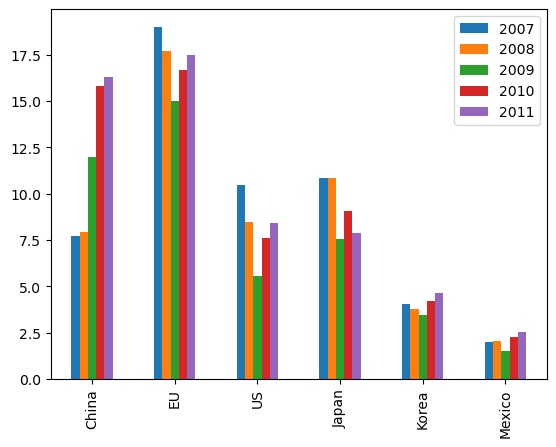

In [ ]:
df.plot()
df.plot.area()
df.plot.line()
df.plot(kind='bar')
df.plot.bar()

<Axes: >

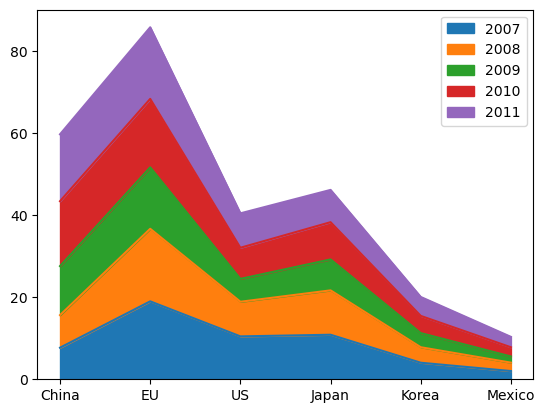

<Axes: >

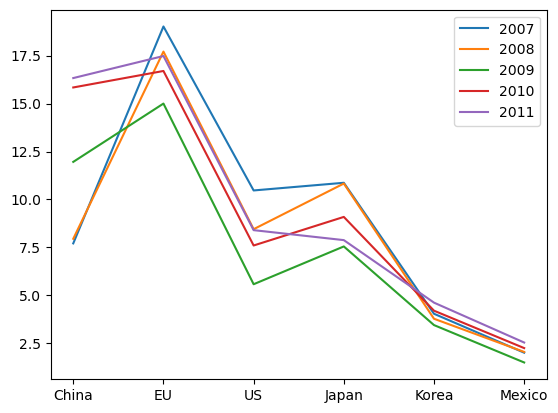

# 결측치

In [ ]:
x = pd.Series([1, 2, np.nan, 4])

In [ ]:
pd.NA
pd.isna(x)

0    False
1    False
2     True
3    False
dtype: bool

In [ ]:
pd.isnull(np.nan)

True

In [ ]:
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'age': [25, np.nan, 30, 22, np.nan],
    'score': [90, 85, np.nan, 88, 95],
    'city': ['Seoul', 'Busan', np.nan, 'Incheon', 'Seoul']
}

df = pd.DataFrame(data)
df

,name,age,score,city
0,Alice,25.0,90.0,Seoul
1,Bob,NaN,85.0,Busan
2,Charlie,30.0,NaN,NaN
3,David,22.0,88.0,Incheon
4,Eva,NaN,95.0,Seoul


In [ ]:
print(pd.isna(df))
print(pd.isnull(df))
print(pd.isnull(df).sum())

    name    age  score   city
0  False  False  False  False
1  False   True  False  False
2  False  False   True   True
3  False  False  False  False
4  False   True  False  False
    name    age  score   city
0  False  False  False  False
1  False   True  False  False
2  False  False   True   True
3  False  False  False  False
4  False   True  False  False
name     0
age      2
score    1
city     1
dtype: int64


In [ ]:
df.dropna()

,name,age,score,city
0,Alice,25.0,90.0,Seoul
3,David,22.0,88.0,Incheon


In [ ]:
df.dropna(axis=1)

,name
0,Alice
1,Bob
2,Charlie
3,David
4,Eva


In [ ]:
df.dropna(subset='score')

,name,age,score,city
0,Alice,25.0,90.0,Seoul
1,Bob,NaN,85.0,Busan
3,David,22.0,88.0,Incheon
4,Eva,NaN,95.0,Seoul


# 채우기

In [ ]:
df.fillna(0)

,name,age,score,city
0,Alice,25.0,90.0,Seoul
1,Bob,0.0,85.0,Busan
2,Charlie,30.0,0.0,0
3,David,22.0,88.0,Incheon
4,Eva,0.0,95.0,Seoul


In [ ]:
# 수치형 변수의 경우 대표값으로 채움 : 평균 mean, 중앙값 median, 최빈값 mode

In [ ]:
df['age'].fillna(df['age'].mean()), df.age.mean()

(0    25.000000
 1    25.666667
 2    30.000000
 3    22.000000
 4    25.666667
 Name: age, dtype: float64,
 np.float64(25.666666666666668))

In [ ]:
df['age'].mode().iloc[0]

np.float64(22.0)

In [ ]:
df[['age']]

,age
0,25.0
1,NaN
2,30.0
3,22.0
4,NaN


In [ ]:
df['age'] < 30

0     True
1    False
2    False
3     True
4    False
Name: age, dtype: bool

In [ ]:
df['age'].mask(df['age'] < 30, 30)

0    30.0
1     NaN
2    30.0
3    30.0
4     NaN
Name: age, dtype: float64

In [ ]:
pd.__version__

'2.2.3'

In [ ]:
titanic_df = pd.read_csv("./data/titanic.csv")
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
pd.isna(titanic_df).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_df['Age'].mean()

np.float64(29.69911764705882)

In [ ]:
print(titanic_df['Age'].fillna(titanic_df['Age'].mean()).mean())
print(titanic_df['Age'].fillna(titanic_df['Age'].median()).mean())
print(titanic_df['Age'].fillna(titanic_df['Age'].mode()).mean())

29.69911764705882
29.36158249158249
29.69911764705882


<Axes: ylabel='Frequency'>

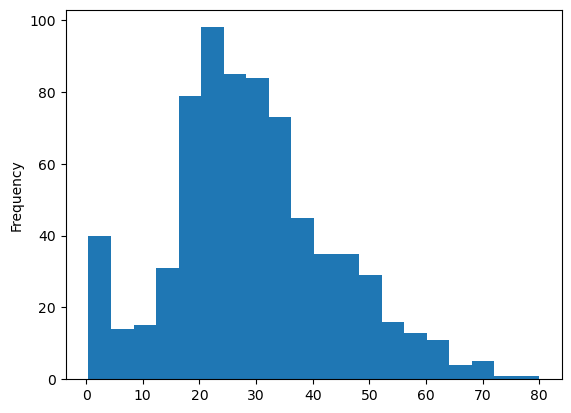

In [ ]:
titanic_df.Age.plot(kind='hist', bins=20)

In [ ]:
# cabin
titanic_df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [ ]:
titanic_df['Cabin'].fillna('unknown', inplace=True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_df['Cabin'].value_counts().head(5)

Cabin
unknown        687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
Name: count, dtype: int64

In [ ]:
# Embarked
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode(), inplace=True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_df['Embarked'].value_counts().head(5)

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

# 지하철 과제

In [470]:
subway_df = pd.read_csv('./data/CARD_SUBWAY_MONTH_202102.csv', index_col=False)
subway_df.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20210201,중앙선,용문,1282,1259,20210204
1,20210201,중앙선,지평,48,43,20210204
2,20210201,중앙선,아신,415,413,20210204
3,20210201,중앙선,양수,1463,1466,20210204
4,20210201,중앙선,운길산,495,463,20210204


In [471]:
#총몇건인지 코드로 확인
len(subway_df)
print(subway_df.count())

사용일자      16751
노선명       16751
역명        16751
승차총승객수    16751
하차총승객수    16751
등록일자      16751
dtype: int64


In [472]:
#평균, 표준편차, 사분위수 등 주요 통계 지표를 확인하세요
subway_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16751 entries, 0 to 16750
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    16751 non-null  int64 
 1   노선명     16751 non-null  object
 2   역명      16751 non-null  object
 3   승차총승객수  16751 non-null  int64 
 4   하차총승객수  16751 non-null  int64 
 5   등록일자    16751 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 785.3+ KB


In [473]:
#몇 개의 컬럼이 있는지, 각 컬럼에 포함된 데이터들의 타입은 무엇인지 확인해보세요.
print(len(subway_df.columns))
print(set([type(subway_df[i].iloc[0]) for i in subway_df.columns]))

6
{<class 'numpy.int64'>, <class 'str'>}


In [474]:
#‘노선명’ 컬럼이 가지고 있는 데이터의 종류와 갯수를 확인하세요
a = set(subway_df['노선명'])
print(a, len(a))

{'9호선2~3단계', '일산선', '장항선', '1호선', '안산선', '9호선', '경부선', '8호선', '경춘선', '수인선', '경강선', '5호선', '경의선', '과천선', '3호선', '분당선', '경원선', '공항철도 1호선', '6호선', '2호선', '중앙선', '경인선', '4호선', '7호선', '우이신설선'} 25


In [475]:
# ‘승차총승객수’ 컬럼을 기준으로 데이터를 정렬하세요
# .sort_values()
subway_df.sort_values(by='승차총승객수')

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
4678,20210208,분당선,복정,1,0,20210211
4367,20210208,6호선,연신내,1,0,20210211
13857,20210224,분당선,복정,1,0,20210227
10025,20210217,경의선,김포공항,1,0,20210220
11481,20210220,분당선,복정,1,0,20210223
...,...,...,...,...,...,...
14384,20210225,2호선,강남,84374,82960,20210228
14314,20210224,2호선,강남,84628,82667,20210227
13705,20210223,2호선,강남,84922,83364,20210226
10857,20210219,2호선,강남,86800,80948,20210222


In [476]:
#‘2호선’만 선택하세요.
subway_df[subway_df['노선명'] == '2호선']

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
532,20210201,2호선,용두(동대문구청),2365,2430,20210204
533,20210201,2호선,신정네거리,9269,9599,20210204
534,20210201,2호선,양천구청,6318,6738,20210204
535,20210201,2호선,도림천,1434,1469,20210204
536,20210201,2호선,신설동,3046,3110,20210204
...,...,...,...,...,...,...
16207,20210228,2호선,신설동,2806,2830,20210303
16208,20210228,2호선,도림천,480,477,20210303
16209,20210228,2호선,양천구청,3234,3281,20210303
16210,20210228,2호선,신정네거리,4814,4805,20210303


In [477]:
# ‘승차총승객수가’이 50000명 이상인 로우의 ‘역명’을 확인하세요.
subway_df[subway_df['승차총승객수'] >= 50000]['역명']

550       구로디지털단지
552            신림
560            강남
562            선릉
566      잠실(송파구청)
           ...   
14994     구로디지털단지
15001        홍대입구
15579    잠실(송파구청)
15585          강남
15602        홍대입구
Name: 역명, Length: 109, dtype: object

In [478]:
# ‘등록일자’ 컬럼을 삭제하세요
subway_df.drop(columns='등록일자', inplace=True)
subway_df

,사용일자,노선명,역명,승차총승객수,하차총승객수
0,20210201,중앙선,용문,1282,1259
1,20210201,중앙선,지평,48,43
2,20210201,중앙선,아신,415,413
3,20210201,중앙선,양수,1463,1466
4,20210201,중앙선,운길산,495,463
...,...,...,...,...,...
16746,20210228,중앙선,오빈,216,236
16747,20210228,중앙선,양평,3299,3187
16748,20210228,중앙선,원덕,322,304
16749,20210228,중앙선,용문,1899,1716


In [479]:
#'승차총승객수’와 ‘하차총승객수’ 컬럼의 차이를 계산한 ‘승하차총승객수차이’ 컬럼을 생성하세요.
subway_df['승하차총승객수차이'] = abs(subway_df['승차총승객수'] - subway_df['하차총승객수'])
subway_df

,사용일자,노선명,역명,승차총승객수,하차총승객수,승하차총승객수차이
0,20210201,중앙선,용문,1282,1259,23
1,20210201,중앙선,지평,48,43,5
2,20210201,중앙선,아신,415,413,2
3,20210201,중앙선,양수,1463,1466,3
4,20210201,중앙선,운길산,495,463,32
...,...,...,...,...,...,...
16746,20210228,중앙선,오빈,216,236,20
16747,20210228,중앙선,양평,3299,3187,112
16748,20210228,중앙선,원덕,322,304,18
16749,20210228,중앙선,용문,1899,1716,183


In [480]:
#‘승하차총승객수차이’의 평균값을 계산하세요
subway_df['승하차총승객수차이'].mean()

np.float64(487.1253059518835)

In [481]:
# 전체 중 10개의 아이템을 샘플링해서 데이터프레임을 생성하세요.
#.sample()
sample_df=subway_df.sample(10)
sample_df

,사용일자,노선명,역명,승차총승객수,하차총승객수,승하차총승객수차이
6619,20210212,2호선,구로디지털단지,11353,11708,355
15069,20210226,4호선,상계,18821,17446,1375
11800,20210220,7호선,학동,10222,10881,659
6635,20210212,2호선,양천구청,1690,1682,8
9353,20210216,장항선,봉명,1158,1120,38
14505,20210225,5호선,답십리,15663,14424,1239
13178,20210223,일산선,화정,16444,17019,575
8283,20210214,2호선,낙성대(강감찬),10999,12695,1696
6218,20210211,경의선,일산,3159,3454,295
12454,20210221,4호선,한성대입구(삼선교),6477,6434,43


In [482]:
#sample_df의 ‘노선명’ 컬럼의 값이 
# 1호선, 2호선, 3호선 4호선을 영어(line1, line2, line3, line4)로 변경하세요
for i in range(len(sample_df['노선명'])):
    if sample_df['노선명'].iloc[i] == "1호선":
        sample_df['노선명'].iloc[i] = 'line1'
    elif sample_df['노선명'].iloc[i] == "2호선":
        sample_df['노선명'].iloc[i] = 'line2'
    elif sample_df['노선명'].iloc[i] == "3호선":
        sample_df['노선명'].iloc[i] = 'line3'
    elif sample_df['노선명'].iloc[i] == "4호선":
        sample_df['노선명'].iloc[i] = 'line4'

sample_df


C:\Users\Admin\AppData\Local\Temp\ipykernel_6536\1640074757.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample_df['노선명'].iloc[i] = 'line2'
C:\Users\Admin\AppData\Local\Temp\ipykernel_6536\1640074757.py:7: SettingWithCopyWarning: 
A v

,사용일자,노선명,역명,승차총승객수,하차총승객수,승하차총승객수차이
6619,20210212,line2,구로디지털단지,11353,11708,355
15069,20210226,line4,상계,18821,17446,1375
11800,20210220,7호선,학동,10222,10881,659
6635,20210212,line2,양천구청,1690,1682,8
9353,20210216,장항선,봉명,1158,1120,38
14505,20210225,5호선,답십리,15663,14424,1239
13178,20210223,일산선,화정,16444,17019,575
8283,20210214,line2,낙성대(강감찬),10999,12695,1696
6218,20210211,경의선,일산,3159,3454,295
12454,20210221,line4,한성대입구(삼선교),6477,6434,43


In [483]:
subway_df

,사용일자,노선명,역명,승차총승객수,하차총승객수,승하차총승객수차이
0,20210201,중앙선,용문,1282,1259,23
1,20210201,중앙선,지평,48,43,5
2,20210201,중앙선,아신,415,413,2
3,20210201,중앙선,양수,1463,1466,3
4,20210201,중앙선,운길산,495,463,32
...,...,...,...,...,...,...
16746,20210228,중앙선,오빈,216,236,20
16747,20210228,중앙선,양평,3299,3187,112
16748,20210228,중앙선,원덕,322,304,18
16749,20210228,중앙선,용문,1899,1716,183


In [467]:
subway_df = subway_df.set_index('사용일자')

In [468]:
subway_df

,노선명,역명,승차총승객수,하차총승객수,승하차총승객수차이
사용일자,,,,,
1970-01-01 00:00:00.020210201,중앙선,용문,1282,1259,23
1970-01-01 00:00:00.020210201,중앙선,지평,48,43,5
1970-01-01 00:00:00.020210201,중앙선,아신,415,413,2
1970-01-01 00:00:00.020210201,중앙선,양수,1463,1466,3
1970-01-01 00:00:00.020210201,중앙선,운길산,495,463,32
...,...,...,...,...,...
1970-01-01 00:00:00.020210228,중앙선,오빈,216,236,20
1970-01-01 00:00:00.020210228,중앙선,양평,3299,3187,112
1970-01-01 00:00:00.020210228,중앙선,원덕,322,304,18
